<a href="https://colab.research.google.com/github/SurajLahariya/DS_learning/blob/main/Assignment_13_KNN_(_Glass_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [129]:
url = 'https://raw.githubusercontent.com/SurajLahariya/DS_learning/main/glass.csv'

In [130]:
df =pd.read_csv(url)

In [131]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [133]:
df.isnull().sum().sum()

0

###Splitting the data

In [134]:
X = df.iloc[:,:-1]
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [135]:
y = df.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [136]:
y.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

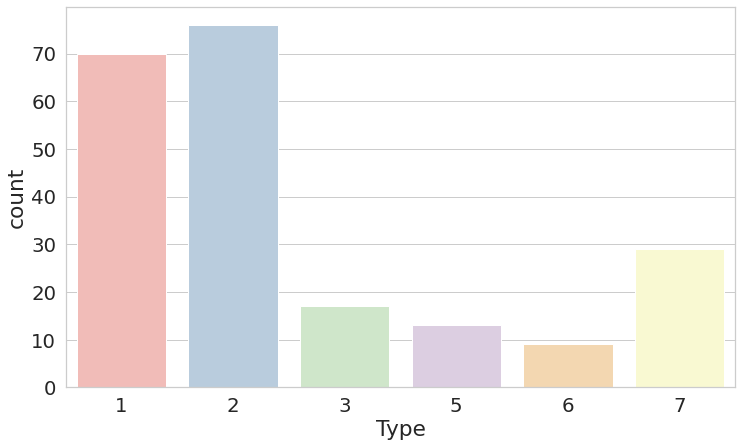

In [137]:
plt.subplots(figsize = (12,7))
sns.countplot(x = df['Type'], palette = 'Pastel1')
sns.set(style = 'whitegrid', font_scale = 1.8)

## Checking for outliers
###With the help of boxplot

####the distribution of features according to glass types is shown.In general, the 2nd glass type has outliers for each property.

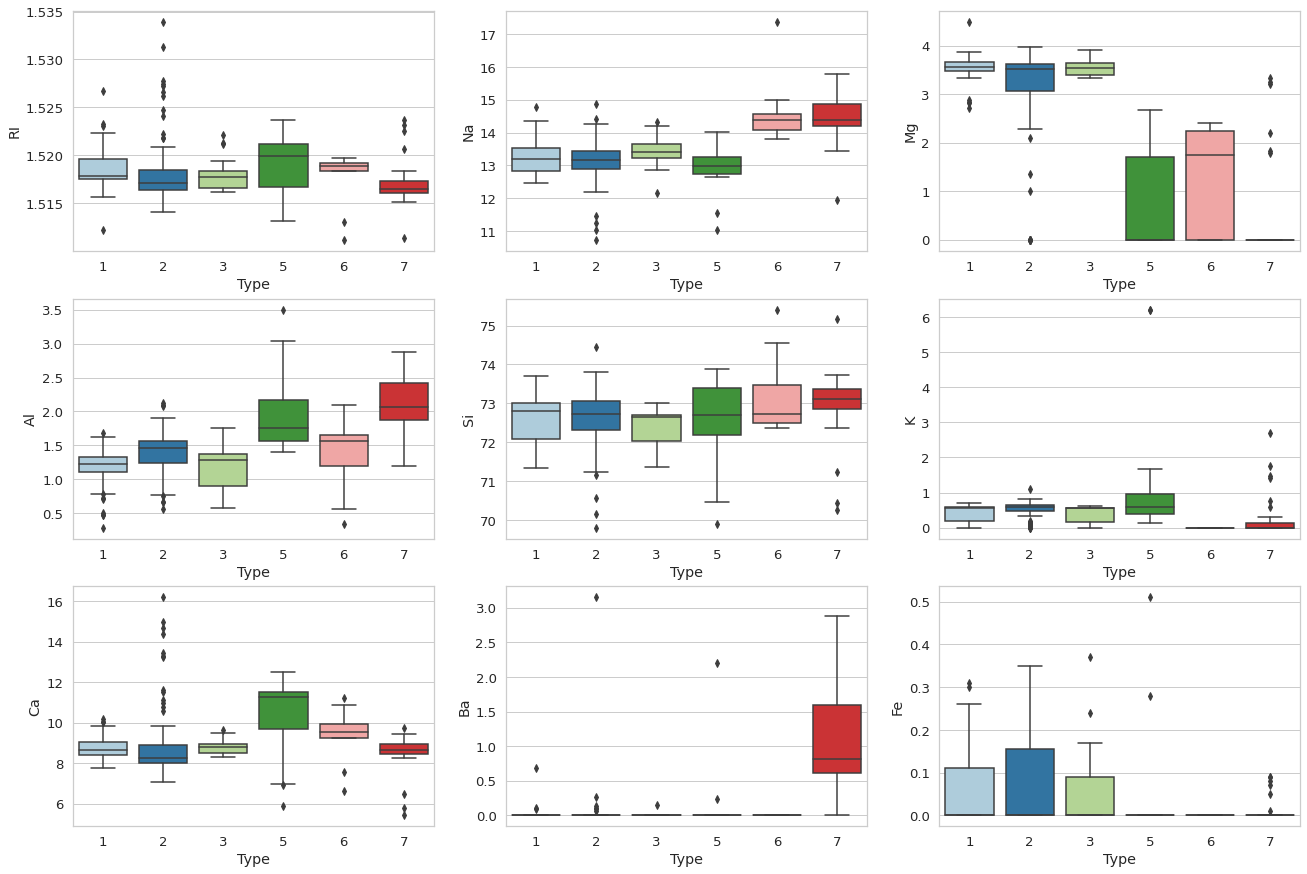

In [138]:
target_class_name = 'Type'
features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

sns.set(style = 'whitegrid', font_scale = 1.2, palette = 'Paired')
plt.subplots(figsize = (22,15))

for i in range(1,10):
    plt.subplot(3,3,i)
    sns.boxplot(x = target_class_name, y = features[i-1], data = df)

###Determination of correlation coefficients between features

####Correlation expresses the relationship between two variables. Values ​​above 0.70 and 0.80 indicate high correlation. The presence of highly correlated features in the data set can be misleading for the model. While applying the model, attention should be paid to feature selection.*italicized text*

In the data set, there is a high correlation of 
0.81 between the Ca element and the brittleness index (RI) of the glass.
0.48 between Ba - Al
0.33 from Ba to Na
There is a negative correlation between Si and the fragility index of glass with a value of -0.54.

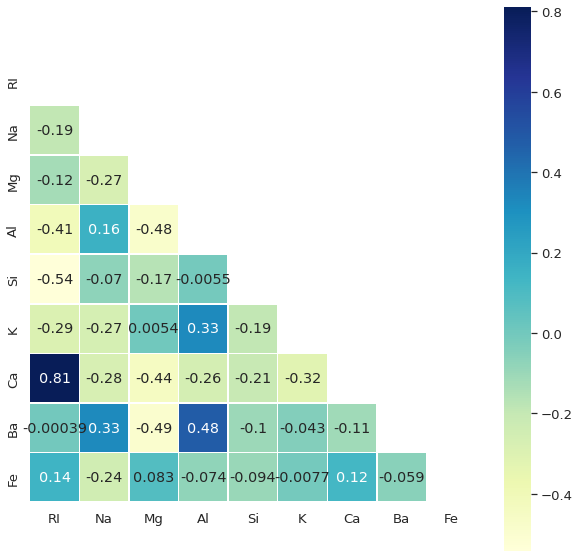

In [139]:
correlation = df[features].corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (10, 10))
sns.heatmap(correlation, mask = mask, cmap = 'YlGnBu', annot = True, linewidth = .5, square = True)

###Splitting the dataset

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=0, stratify = y)

###Scaling the data

In [141]:
r = RobustScaler()

In [142]:
r.fit(X_train)

RobustScaler()

In [143]:
X_train_scaled = r.transform(X_train)

In [144]:
X_test_scaled = r.transform(X_test)

In [145]:
X_train_scaled

array([[-2.54826255,  4.75862069, -2.20952381, ..., -2.21348315,
         0.        ,  0.        ],
       [ 0.2972973 ,  0.97701149, -0.81904762, ...,  0.78651685,
         0.        ,  0.        ],
       [ 0.06949807, -0.51724138,  0.01269841, ...,  0.16853933,
         0.        ,  0.        ],
       ...,
       [-0.02702703, -0.7816092 ,  0.02539683, ..., -0.08988764,
         0.        ,  0.        ],
       [ 0.18918919, -0.42528736,  0.        , ..., -0.21348315,
         0.        ,  0.        ],
       [-0.69111969, -0.51724138,  0.08253968, ..., -0.61797753,
         0.        ,  2.6       ]])

##K-Nearest Neighbors Classification

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, accuracy_score

In [147]:
model = KNeighborsClassifier(n_neighbors=3)

In [148]:
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [149]:
y_pred = model.predict(X_test_scaled)

In [150]:
mean_absolute_error(y_test, y_pred)

0.9302325581395349

In [151]:
accuracy_score(y_test, y_pred)

0.6511627906976745

In [152]:
err_rate = []
for i in range(1,21):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)
  err_rate.append(np.mean(pred!=y_test))


Text(0, 0.5, 'Error Rate')

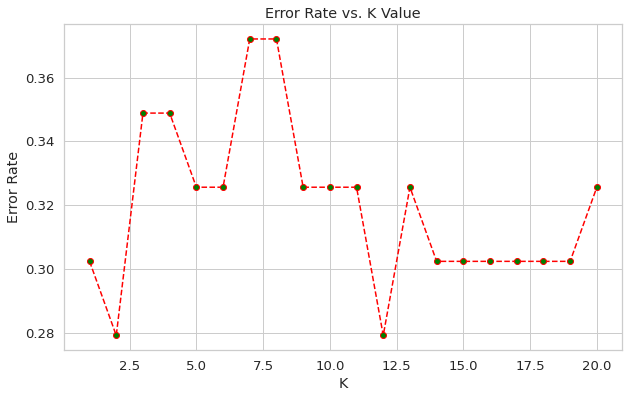

In [153]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),err_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=6)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

###Cross Val Score

In [154]:
ct = ColumnTransformer([
    ('rob', RobustScaler(), X.columns)   
])

In [155]:
pipe = Pipeline([
    ('ct_step', ct),
    ('model', KNeighborsClassifier(n_neighbors=2))
])

In [156]:
results = cross_val_score(estimator=pipe, X=X, y=y, scoring='accuracy', cv=5)

In [157]:
results

array([0.62790698, 0.69767442, 0.72093023, 0.6744186 , 0.66666667])

In [158]:
results.mean()

0.6775193798449612

Cross Validation accuracy

In [159]:
import matplotlib.pyplot as plt
%matplotlib inline

k_scores = []

for k in range(1,41):
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X=X, y=y, scoring='accuracy', cv=5)
  k_scores.append(scores.mean())

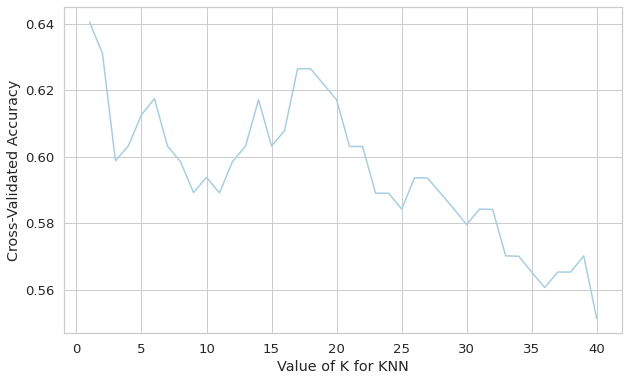

In [160]:
# plot to see clearly
plt.figure(figsize=(10,6))
plt.plot(range(1,41), k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## Using Grid Search CV

In [161]:
knn = KNeighborsClassifier()

In [162]:
knn_params = {
    'n_neighbors': np.arange(1,50)
    }

In [163]:
knn_cv_model = GridSearchCV(estimator=knn,
             param_grid=knn_params, cv=10, n_jobs=-1).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


In [164]:
knn_cv_model.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [165]:
knn_tuned = knn_cv_model.best_estimator_.fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score for KNN: {}'.format(knn_accuracy))

Accuracy score for KNN: 0.6976744186046512


In [166]:
pd.DataFrame(knn_cv_model.cv_results_).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003871,0.000988,0.004570,0.000958,1,{'n_neighbors': 1},0.666667,0.647059,0.764706,0.764706,0.764706,0.647059,0.588235,0.705882,0.823529,0.647059,0.701961,0.070588,1
1,0.004501,0.001030,0.003953,0.000087,2,{'n_neighbors': 2},0.555556,0.647059,0.647059,0.764706,0.764706,0.529412,0.588235,0.764706,0.823529,0.647059,0.673203,0.095657,3


Accuracy value is calculated by the ratio of correctly predicted areas in the model to the total data set.
Especially in data sets that are not evenly distributed, this value alone is not sufficient. Therefore, it is necessary to evaluate the results of other metrics together.

In [167]:
#confusion Matrix of KNN

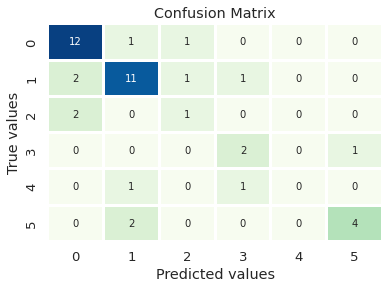

In [168]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, lw = 2, cbar = False, cmap = 'GnBu')
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.title('Confusion Matrix')
plt.show()

###Since the Accuracy value alone is not enough, the results of precision, recall and f1-score values ​​are displayed with the classification_report() method.
The Precision value shows how many of the positively predicted values ​​are actually positive.

The Recall value shows how many of the transactions we need to predict positively are positive.

F1-score value shows the harmonic average of precision and recall values.

In [169]:
#Classification report for KNN
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.73      0.73      0.73        15
           3       0.33      0.33      0.33         3
           5       0.50      0.67      0.57         3
           6       0.00      0.00      0.00         2
           7       0.80      0.67      0.73         6

    accuracy                           0.70        43
   macro avg       0.52      0.54      0.53        43
weighted avg       0.67      0.70      0.68        43



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Over-sampling with SMOTE (Synthetic Minority Over-sampling Technique)

One of the methods that can be used to eliminate the imbalance in the data set is the sampling (resampling) process. There are two methods available:

The first method is to obtain classes with equal number of data by increasing the data of minority classes with various methods. It is called oversampling.

Another method is to obtain a balanced dataset by removing the data belonging to the weighted class from the dataset. It is referred to as the undersampling process.

The oversampling method was preferred because the number of samples in the used dataset is small and undersampling will cause data loss. In order to apply this method, synthetic data belonging to minority classes were produced by using the SMOTE technique in the imbalanced-learn library.

####Class distributions are shown on the graph before the SMOTE operation is performed.

There are 69 examples for Class 1, 76 examples for Class 2, 17 examples for Class 3, 13 examples for Class 5, 9 examples for Class 6, and 29 examples for Class 7.

Text(0.5, 1.0, 'Before SMOTE')

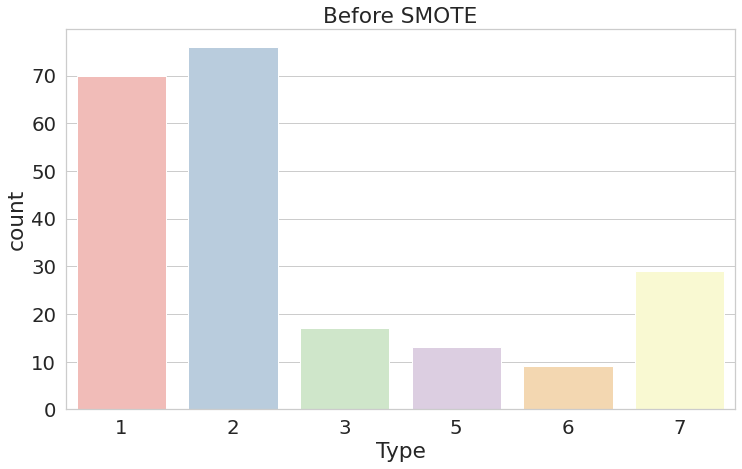

In [170]:
sns.set(style = 'whitegrid', font_scale = 1.8)
plt.subplots(figsize = (12,7))
sns.countplot(x = y, palette = 'Pastel1').set_title('Before SMOTE')

In [171]:
#SMOTE 
import imblearn
from imblearn.over_sampling import SMOTE

In [172]:
sm = SMOTE(random_state=40)
X_res, y_res = sm.fit_resample(X, y)

In [173]:
y_res_df = pd.DataFrame(y_res)
y_res_df.head()

,Type
0,1
1,1
2,1
3,1
4,1


Text(0.5, 1.0, 'After SMOTE')

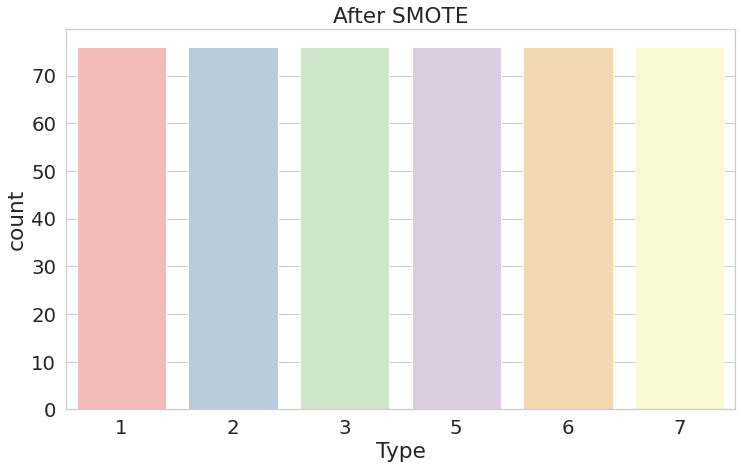

In [174]:
sns.set(style = 'whitegrid', font_scale = 1.8)
plt.subplots(figsize = (12,7))
sns.countplot(x = y_res_df.Type, palette = 'Pastel1').set_title('After SMOTE')

In [175]:
print(X_res.shape)
print(y_res.shape)

(456, 9)
(456,)


In [176]:
X_res.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


###Feature Scaling (Standard Scaler)

Conditions such as the distribution of the data and the scale differences between the features are the factors affecting the operation of the algorithms. In this case, pulling the features into a common data range allows us to obtain more accurate results.

Standardization; It is a method in which the mean value is 0 and the standard deviation is 1, and the distribution approaches normal.

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = .2, random_state = 40, stratify = y_res)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

###LDA (Linear Discriminant Analysis)

It is used as a size reduction technique. It reduces size in the dataset by maximizing the difference between classes. The aim is to prevent overfitting and reduce computational costs.

In the data set, 9 attributes were reduced to 5 significant components with the help of LDA.

In [192]:
lda = LDA(n_components = 5)
X_train_lda = lda.fit_transform(X_train_sc, y_train)
X_test_lda = lda.transform(X_test_sc)

print(X_train_lda.shape)
print(X_test_lda.shape)
print(y_train.shape)
print(y_test.shape)

(364, 5)
(92, 5)
(364,)
(92,)


###K-Nearest Neighbors Classification

In [193]:
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': np.arange(1,50)}
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train_lda, y_train)

In [194]:
knn_tuned = knn_cv_model.best_estimator_.fit(X_train_lda, y_train)
y_pred = knn_tuned.predict(X_test_lda)
knn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score for KNN: {}'.format(knn_accuracy))

Accuracy score for KNN: 0.8478260869565217


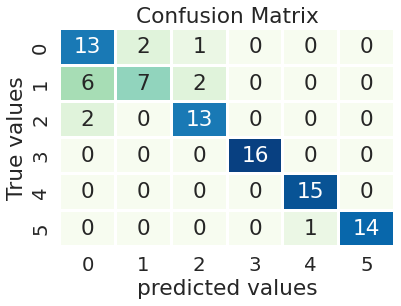

In [195]:
#Confusion Matrix of KNN
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, lw = 2, cbar = False, cmap = 'GnBu')
plt.ylabel('True values')
plt.xlabel('predicted values')
plt.title('Confusion Matrix')
plt.show()

In [196]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.81      0.70        16
           2       0.78      0.47      0.58        15
           3       0.81      0.87      0.84        15
           5       1.00      1.00      1.00        16
           6       0.94      1.00      0.97        15
           7       1.00      0.93      0.97        15

    accuracy                           0.85        92
   macro avg       0.86      0.85      0.84        92
weighted avg       0.86      0.85      0.84        92

